### NOTEARS Analysis:

Robustness of the algorithm to change in datatypes: 
- Measurement -> Categorical 

## Diabetes dataset

----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
  - age     age in years
  - sex
  - bmi     body mass index
  - bp      average blood pressure
  - s1      tc, total serum cholesterol
  - s2      ldl, low-density lipoproteins
  - s3      hdl, high-density lipoproteins
  - s4      tch, total cholesterol / HDL
  - s5      ltg, possibly log of serum triglycerides level
  - s6      glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).


## Data Intial Run

In [2]:
import pandas as pd

data = pd.read_csv('../data/medical/diabetes.csv')
data.head(5)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [65]:
#### To learn causal graph from full measurements data
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import random
import numpy as np 

# Set the random seed for numpy
np.random.seed(50)
# Set the random seed for Python's built-in random module
random.seed(50)

initial_sm = from_pandas(data)

# viz = plot_structure(
#     initial_sm,
#     all_node_attributes=NODE_STYLE.WEAK,
#     all_edge_attributes=EDGE_STYLE.WEAK,
# )
# viz.toggle_physics(False)
# viz.show("graph_viz/diabetes_data.html")

graph_viz/diabetes_data.html


In [68]:
def weights_analysis(sm):

    weights = 0
    edges = 0
    max = 0
    min = 0
    # graph = {}
    for node in sm.adjacency(): 
        # weights = 
        # node_edge_weights_sum = 0
        node_edges = []
        for edge in node[1]:   
            weights += node[1][edge]['weight']
            if node[1][edge]['weight'] > max: 
                max = node[1][edge]['weight']
            if node[1][edge]['weight'] < min: 
                min = node[1][edge]['weight']

            edges += 1
            node_edges.append(node[1][edge]['weight'])
    print('sum of weights', weights)
    print('sum of edges counted', edges)
    print('weights / edges', weights / edges)
    print('max weight of edges', max)
    print('min weight of edges', min)
    return
weights_analysis(initial_sm)

# #47.78713648666739
# 29
# 1.6478322926437032 (chosen threshold value)
# 26.612244708503734
# -26.07149529888135

sum of weights 50.352138929312645
sum of edges counted 110
weights / edges 0.45774671753920587
max weight of edges 26.612244708503734
min weight of edges -26.07149529888135


In [71]:
initial_sm.remove_edges_below_threshold(0.46)
## to decide how to choose threshold
viz = plot_structure(
    initial_sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
viz.toggle_physics(0)
viz.show("graph_viz/0.46_diabetes_data.html")

graph_viz/0.46_diabetes_data.html


In [104]:
### recover adjacency matrix 
import networkx as nx

def to_adj_matrix(sm):
    data = []
    for node in sm.adjacency(): 
        data.append(node)
    
    # Create an empty directed graph
    G = nx.DiGraph()

    # Add nodes and edges to the graph
    for node, neighbors in data:
        G.add_node(node)
        for neighbor in neighbors:
            G.add_node(neighbor)
            G.add_edge(node, neighbor)

    # Convert the graph to an adjacency matrix
    adjacency_matrix = nx.adjacency_matrix(G).todense()
    return G, adjacency_matrix

G, initial_sm_adj = to_adj_matrix(initial_sm)
# Print the adjacency matrix
print(initial_sm_adj)
print(G.nodes)

[[0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 1 1 0 0 0 0 1 0]
 [1 0 1 1 1 1 0 0 0 1 1]
 [1 0 1 1 1 1 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 1 1 0]]
['AGE', 'SEX', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y', 'BMI']


In [92]:
labels = [node for node in G.nodes]
labels

['AGE', 'SEX', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y', 'BMI']

In [86]:
initial_sm_adj

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0]])

## Measurements only
- limitation: removal of sex and age - might result in lost of var ; presence of confounding variables in relationships learnt.

In [21]:
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [17]:
## drop non measurements data 
drop_col = ['SEX', 'AGE']
cont_data = data.drop(columns=drop_col)
cont_data.head(5)

,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [96]:
#### To learn causal graph from full measurements data
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import random
import numpy as np 

# Set the random seed for numpy
np.random.seed(50)
# Set the random seed for Python's built-in random module
random.seed(50)

cont_sm = from_pandas(cont_data)

viz = plot_structure(
    cont_sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
viz.toggle_physics(False)
viz.show("graph_viz/cont_diabetes_data.html")
weights_analysis(cont_sm)

graph_viz/cont_diabetes_data.html
sum of weights 62.40169017229982
sum of edges counted 72
weights / edges 0.866690141281942
max weight of edges 27.26042249350398
min weight of edges -15.852657043168428


In [105]:
cont_sm.remove_edges_below_threshold(0.8)
## to decide how to choose threshold
viz = plot_structure(
    cont_sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
viz.toggle_physics(0)
viz.show("graph_viz/0.8_cont_diabetes_data.html")

graph_viz/0.8_cont_diabetes_data.html


In [107]:
G, cont_sm_adj = to_adj_matrix(cont_sm)
# Print the adjacency matrix
print(cont_sm_adj)
print(G.nodes)

[[0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 0 0]
 [0 0 1 0 1 1 1 0 1]
 [1 1 0 1 1 1 1 0 0]]
['BMI', 'S6', 'Y', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5']


In [129]:
for nodes in cont_sm.adjacency(): 
    print(nodes)

('BMI', {'S6': {'origin': 'learned', 'weight': 1.1869726120410031}, 'Y': {'origin': 'learned', 'weight': 5.791539874418242}})
('BP', {})
('S1', {'Y': {'origin': 'learned', 'weight': 1.6193284081410122}})
('S2', {'S1': {'origin': 'learned', 'weight': 0.906323868136236}, 'Y': {'origin': 'learned', 'weight': -1.5891421415566183}})
('S3', {'S2': {'origin': 'learned', 'weight': 1.2918702227554362}, 'Y': {'origin': 'learned', 'weight': -3.2460994585867957}})
('S4', {'S1': {'origin': 'learned', 'weight': 2.2073029470037318}, 'S2': {'origin': 'learned', 'weight': 27.26042249350398}, 'S3': {'origin': 'learned', 'weight': -10.466380679967743}, 'S5': {'origin': 'learned', 'weight': 1.0590367192847794}, 'Y': {'origin': 'learned', 'weight': -8.806232824287385}})
('S5', {'BMI': {'origin': 'learned', 'weight': 5.044046313750065}, 'BP': {'origin': 'learned', 'weight': 11.596601295926321}, 'S1': {'origin': 'learned', 'weight': 15.970386765936075}, 'S2': {'origin': 'learned', 'weight': -15.8526570431684

#### Future: Trad Method (BIC Score)

## Categorical

In [148]:
cont_data

,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...
437,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [149]:
import pandas as pd

# Sample data: a list of numerical measurements
# cont_data.describe()
cont_data_bins = {}
for col in cont_data.columns:
    mean = cont_data.describe()[col]['mean']
    std = cont_data.describe()[col]['std']
    bins = [mean-3*std, mean-2*std, mean-std, mean, mean+std, mean+2*std, mean+3*std]
    cont_data_bins[col] = bins

discrete_data = {}
for col in cont_data.columns:
# Convert the list into a DataFrame
    df = pd.DataFrame(cont_data[col])
   
    # Define bins and their corresponding labels
    # Assuming we want to categorize these measurements into three categories
    bins = cont_data_bins[col]
    labels = [1, 2, 3, 4, 5, 6]

    # Use the cut function to transform the measurements into categorical labels
    df[col+'_discrete'] = pd.cut(df[col], bins=bins, labels=labels, right=False)
    
    discrete_data[col] = df[col+'_discrete']
# Display the updated DataFrame
print(discrete_data)

{'BMI': 0      5
1      2
2      4
3      3
4      3
      ..
437    4
438    3
439    3
440    4
441    2
Name: BMI_discrete, Length: 442, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6], 'BP': 0      4
1      3
2      3
3      3
4      4
      ..
437    5
438    2
439    4
440    4
441    2
Name: BP_discrete, Length: 442, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6], 'S1': 0      3
1      3
2      3
3      4
4      4
      ..
437    3
438    5
439    3
440    4
441    5
Name: S1_discrete, Length: 442, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6], 'S2': 0      3
1      3
2      3
3      4
4      4
      ..
437    3
438    5
439    3
440    4
441    4
Name: S2_discrete, Length: 442, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6], 'S3': 0        3
1        5
2        3
3        3
4        4
      ... 
437      3
438      3
439      3
440      3
441    NaN
Name: S3_discrete, Length: 442, dtype: category
Categories (6, int

In [111]:
cont_data.describe()['BMI']['mean']

26.37579185520362

In [150]:
discrete_data_df = pd.DataFrame(discrete_data)
discrete_data_df

,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,5,4,3,3,3,3,4,3,3
1,2,3,3,3,5,3,2,2,2
2,4,3,3,3,3,3,4,3,3
3,3,3,4,4,3,4,4,3,4
4,3,4,4,4,4,3,3,3,3
...,...,...,...,...,...,...,...,...,...
437,4,5,3,3,3,3,4,4,4
438,3,2,5,5,3,4,3,4,3
439,3,4,3,3,3,3,3,4,3
440,4,4,4,4,3,4,4,3,4


In [151]:
# Loop through each column in the DataFrame
df = discrete_data_df

for column in df.columns:
    # Convert the column to numeric, coercing errors to NaN
    # This will leave non-numeric columns as NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')

discrete_data_df = df

In [152]:
discrete_data_df.isna().sum()
# drop NaN datarows? 

BMI    2
BP     0
S1     2
S2     2
S3     5
S4     4
S5     0
S6     0
Y      0
dtype: int64

In [153]:
discrete_data_df.dropna(inplace=True)
discrete_data_df

,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,5.0,4,3.0,3.0,3.0,3.0,4,3,3
1,2.0,3,3.0,3.0,5.0,3.0,2,2,2
2,4.0,3,3.0,3.0,3.0,3.0,4,3,3
3,3.0,3,4.0,4.0,3.0,4.0,4,3,4
4,3.0,4,4.0,4.0,4.0,3.0,3,3,3
...,...,...,...,...,...,...,...,...,...
436,2.0,2,3.0,3.0,5.0,2.0,2,3,2
437,4.0,5,3.0,3.0,3.0,3.0,4,4,4
438,3.0,2,5.0,5.0,3.0,4.0,3,4,3
439,3.0,4,3.0,3.0,3.0,3.0,3,4,3


In [154]:
#### To learn causal graph from full measurements data
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import random
import numpy as np 

# Set the random seed for numpy
np.random.seed(50)
# Set the random seed for Python's built-in random module
random.seed(50)

disc_sm = from_pandas(discrete_data_df)

viz = plot_structure(
    disc_sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
viz.toggle_physics(False)
viz.show("graph_viz/disc_diabetes_data.html")

graph_viz/disc_diabetes_data.html


In [155]:
weights_analysis(disc_sm)

sum of weights 4.8064734851678335
sum of edges counted 72
weights / edges 0.06675657618288658
max weight of edges 0.9623593340016744
min weight of edges -0.27267195319748055


In [156]:
disc_sm.remove_edges_below_threshold(0.06)
## to decide how to choose threshold
viz = plot_structure(
    disc_sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
viz.toggle_physics(0)
viz.show("graph_viz/0.06_disc_diabetes_data.html")

graph_viz/0.06_disc_diabetes_data.html


In [158]:
cont_sm_adj
print(G.nodes)

['BMI', 'S6', 'Y', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5']


In [157]:
disc_G, disc_sm_adj = to_adj_matrix(disc_sm)
# Print the adjacency matrix
print(disc_sm_adj)
print(disc_G.nodes)

[[0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0]
 [0 1 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0]]
['BMI', 'S3', 'S6', 'BP', 'S4', 'S1', 'S2', 'S5', 'Y']


In [160]:
desired_columns = ['BMI', 'S6', 'Y', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5']

df = pd.DataFrame(disc_sm_adj, columns=G.nodes)
df = df[desired_columns]
df

,BMI,S6,Y,BP,S1,S2,S3,S4,S5
0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0
5,0,1,0,0,0,0,1,0,0
6,0,1,0,0,0,0,0,1,0
7,0,1,0,0,0,0,0,0,1
8,1,1,0,0,0,0,0,0,0


In [164]:
disc_sm_adj_remapped = df.to_numpy()

## Compare 

- compare SHD score 

- reconstruct into adj matrix 

In [165]:
from cdt.metrics import SHD
# from numpy.random import randint
# tar, pred = randint(2, size=(10, 10)), randint(2, size=(10, 10))
SHD(cont_sm_adj, disc_sm_adj_remapped, double_for_anticausal=False)

21.0

## traditional methods

In [166]:
pip install causal-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [168]:
cont_data

,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...
437,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [175]:
Record['G']

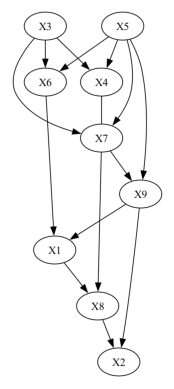

In [170]:
from causallearn.search.ScoreBased.GES import ges
X = cont_data
score_func = "local_score_BIC"
# default parameters
Record = ges(X)

# or customized parameters
Record = ges(X, score_func, maxP=None, parameters=None)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


# or save the graph
pyd.write_png('simple_test.png')

In [198]:
nodes = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9']
cont_bic_adj = np.array([
    [0, 0, 0, 0, 0, 0, 0, 1, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0]])


In [191]:
# Record['G'].get_nodes()

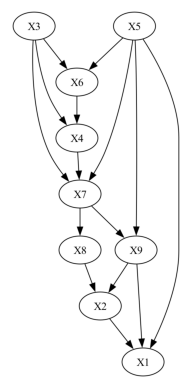

In [182]:
from causallearn.search.ScoreBased.GES import ges
X = discrete_data_df
score_func = "local_score_BIC"
# default parameters
Record = ges(X)

# or customized parameters
Record = ges(X, score_func, maxP=None, parameters=None)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


# or save the graph
pyd.write_png('simple_test.png')

In [197]:
nodes = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9']
disc_bic_adj = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0],
    [1, 0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0]])


In [199]:
SHD(cont_bic_adj, disc_bic_adj, double_for_anticausal=False)

8.0

### how does insights differ from correlation? (tbc)

In [17]:
import matplotlib.pyplot as plt

corr = data.corr()
corr

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


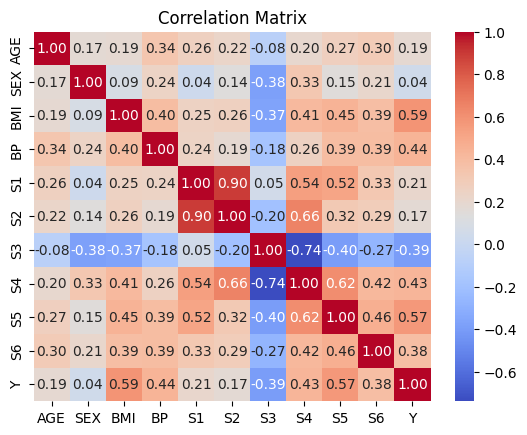

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_matrix is your correlation matrix
# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and show plot
plt.title('Correlation Matrix')
plt.show()

diabetes.ipynb
